In [1]:
import pandas as pd
df = pd.read_csv('LB_Forecast_Cash_1.csv')
df.head()

,Year,Week,ds,y,Recievables
0,2022,1,1/3/2022,1347046.53,216637.49
1,2022,2,1/10/2022,1348547.51,220001.93
2,2022,3,1/17/2022,1362682.96,186053.69
3,2022,4,1/24/2022,1297296.15,291930.41
4,2022,5,1/31/2022,1328902.74,298268.57


In [2]:
df.tail()

,Year,Week,ds,y,Recievables
50,2022,51,12/23/2022,1389907.43,384005.37
51,2022,52,12/30/2022,1338004.43,545430.74
52,2023,53,1/6/2023,1454978.00,466460.02
53,2023,54,1/13/2023,1459397.88,400181.12
54,2023,55,1/20/2023,1401274.54,394238.05


In [3]:
train = df[:-4]
test = df[-4:]

In [4]:
import numpy as np

historical_mean =  np.mean(train['y'])
print(historical_mean)

1310830.5794117649


In [5]:
test.loc[:, 'pred_last_season'] = train['y'][-4:].values

C:\Users\User\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [6]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [7]:
mape_naive_seasonal = mape(test['y'], test['pred_last_season'])
print(mape_naive_seasonal)

2.4410402752315896


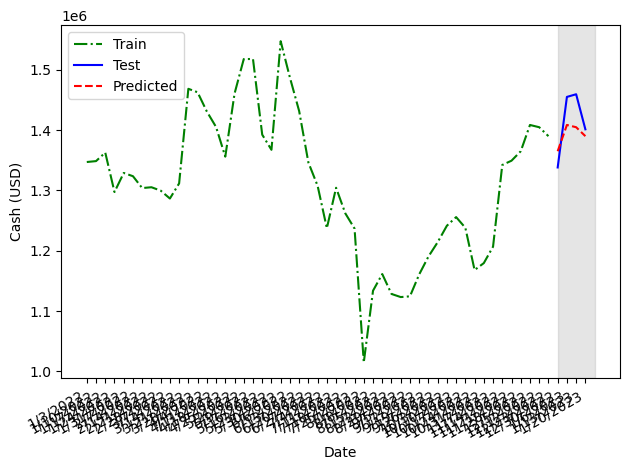

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(train['ds'], train['y'], 'g-.', label='Train')
ax.plot(test['ds'], test['y'], 'b-', label='Test')
ax.plot(test['ds'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Cash (USD)')
ax.axvspan(51, 55, color='#808080', alpha=0.2)
ax.legend(loc=2)



fig.autofmt_xdate()
plt.tight_layout()